In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DjFBY2payikdfGXLHjtM")
project = rf.workspace("objectdetection-dxeuw").project("face-detection-z1x9s")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face-detection-1 in yolov8:: 100%|██████████| 10111/10111 [00:02<00:00, 4570.14it/s]


In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [6]:
!yolo task= detect mode= train data=/content/face-detection-1/data.yaml model=yolov8m.pt epochs=25 imgsz=640 batch=32

100% 49.7M/49.7M [00:00<00:00, 335MB/s]
Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/face-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [7]:
from IPython.display import Image, display

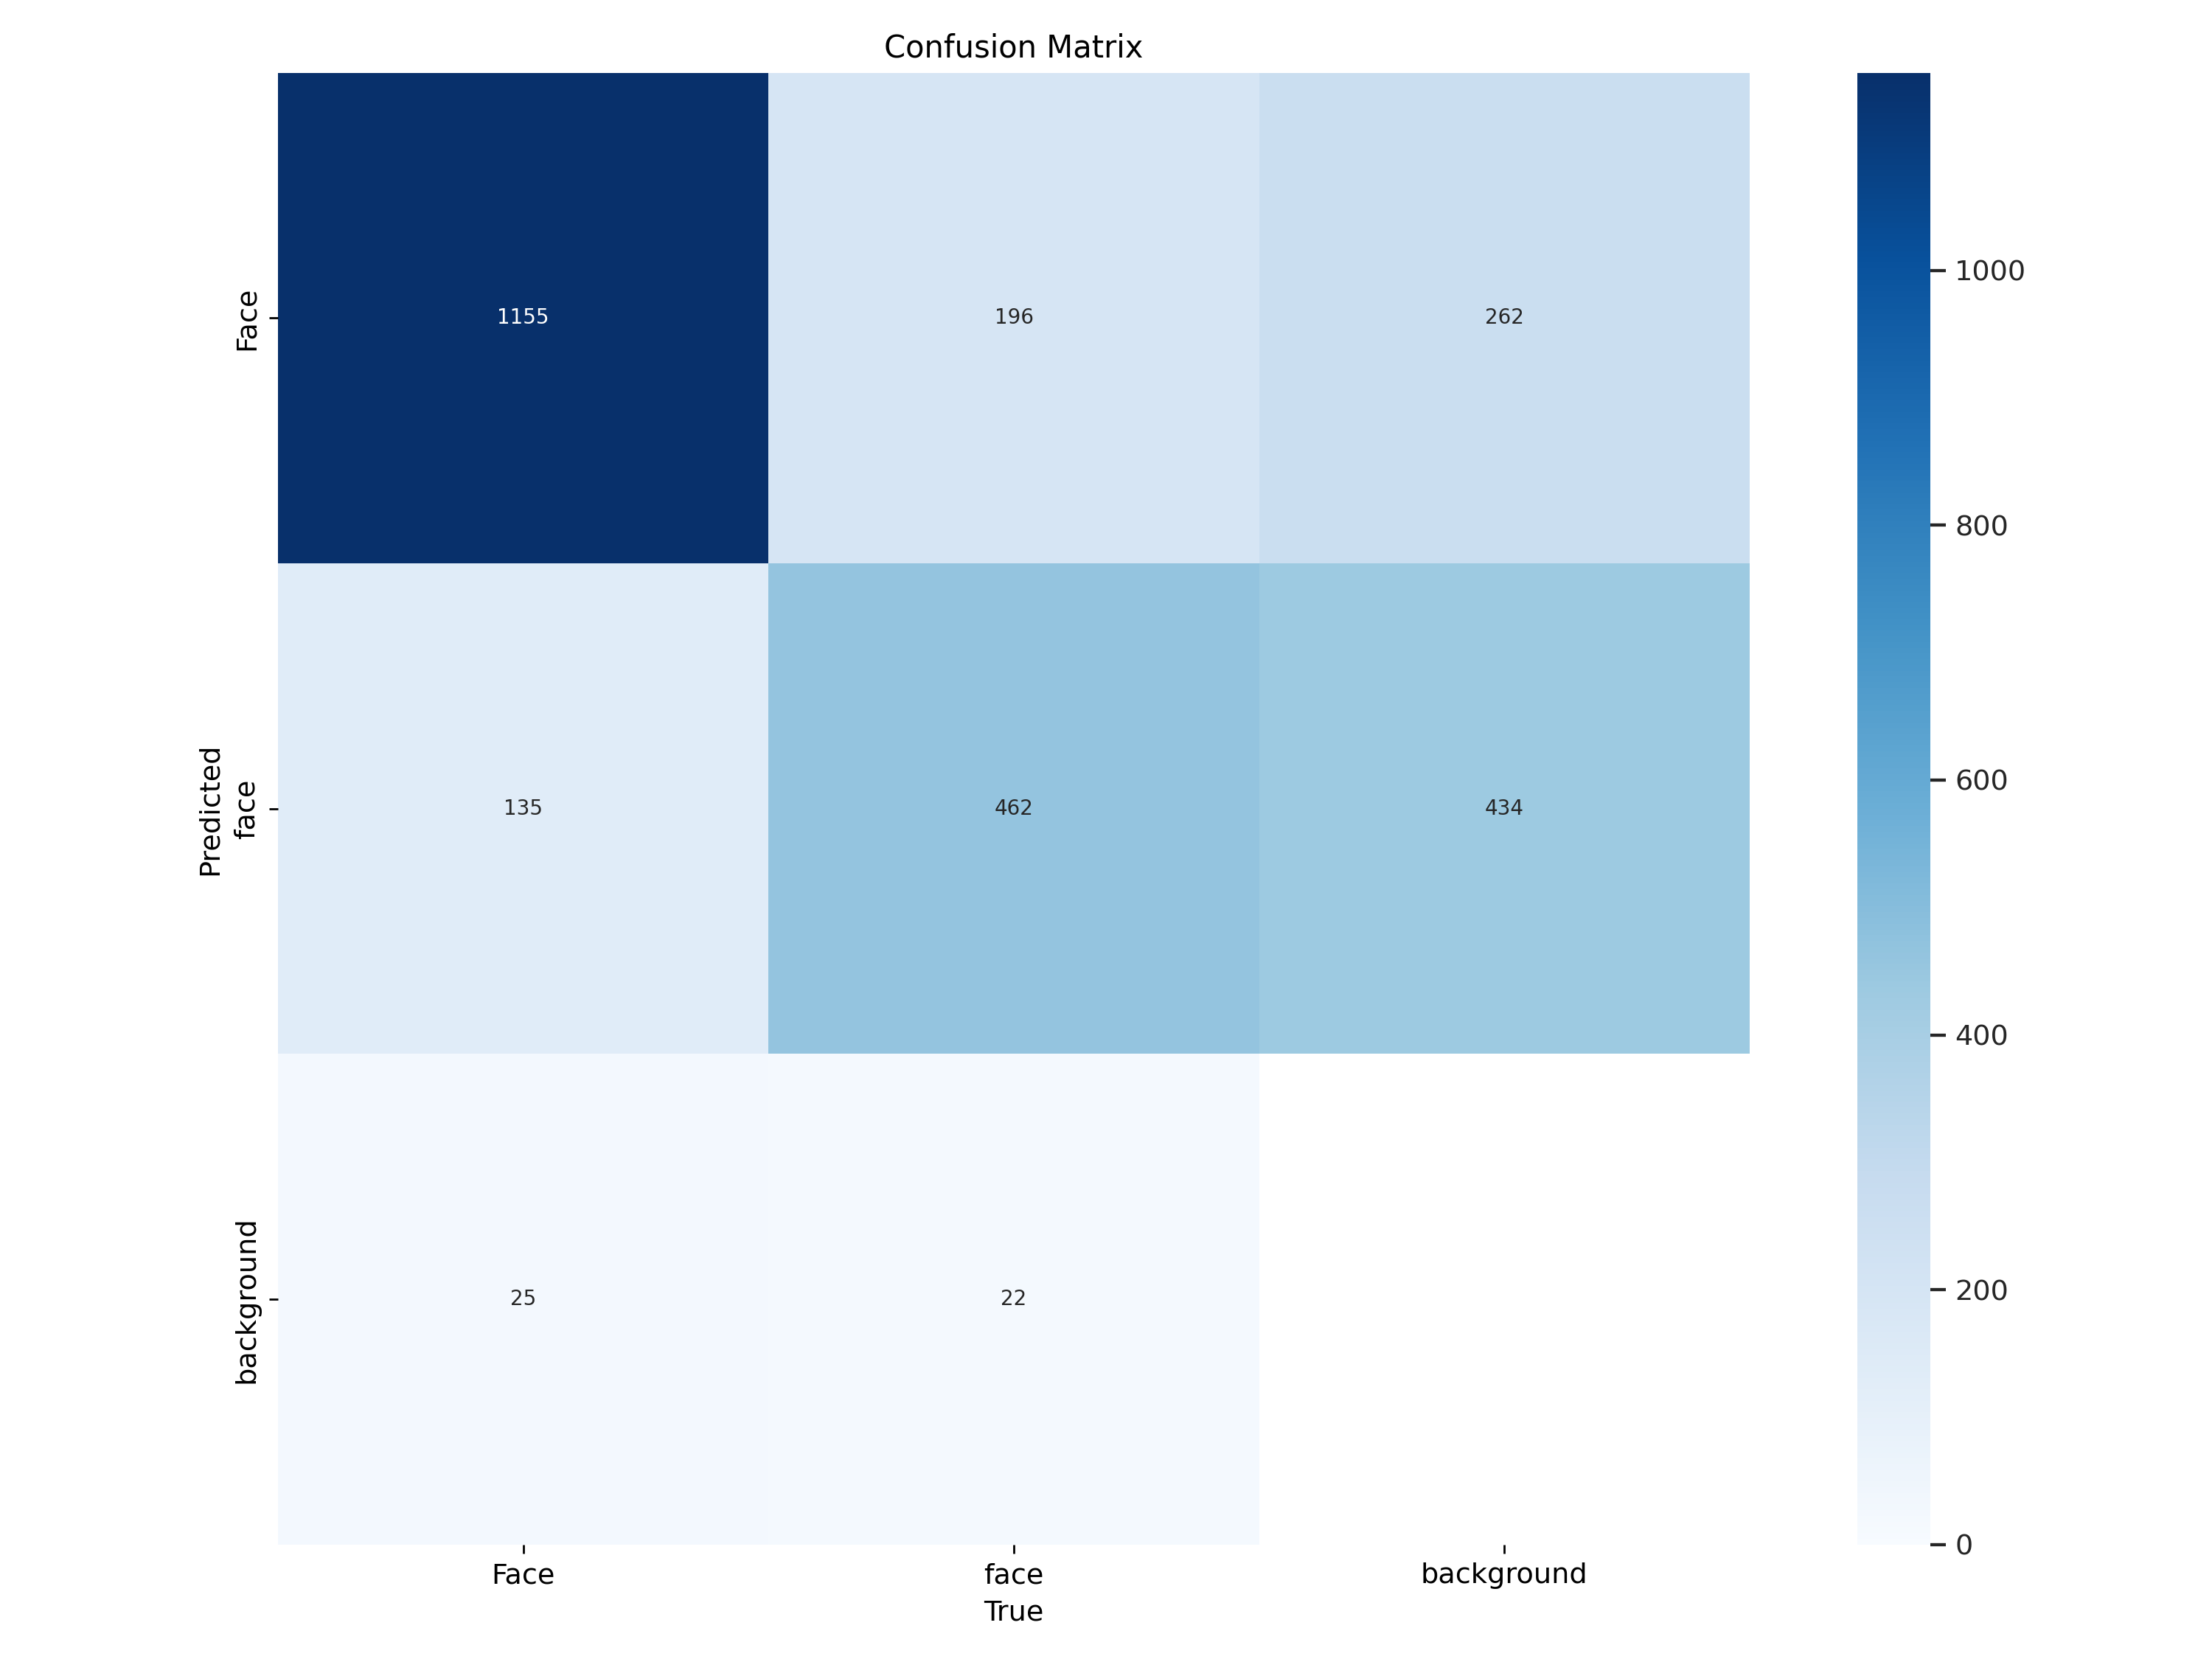

In [8]:
display(Image(filename=f"/content/runs/detect/train3/confusion_matrix.png", width=1000))

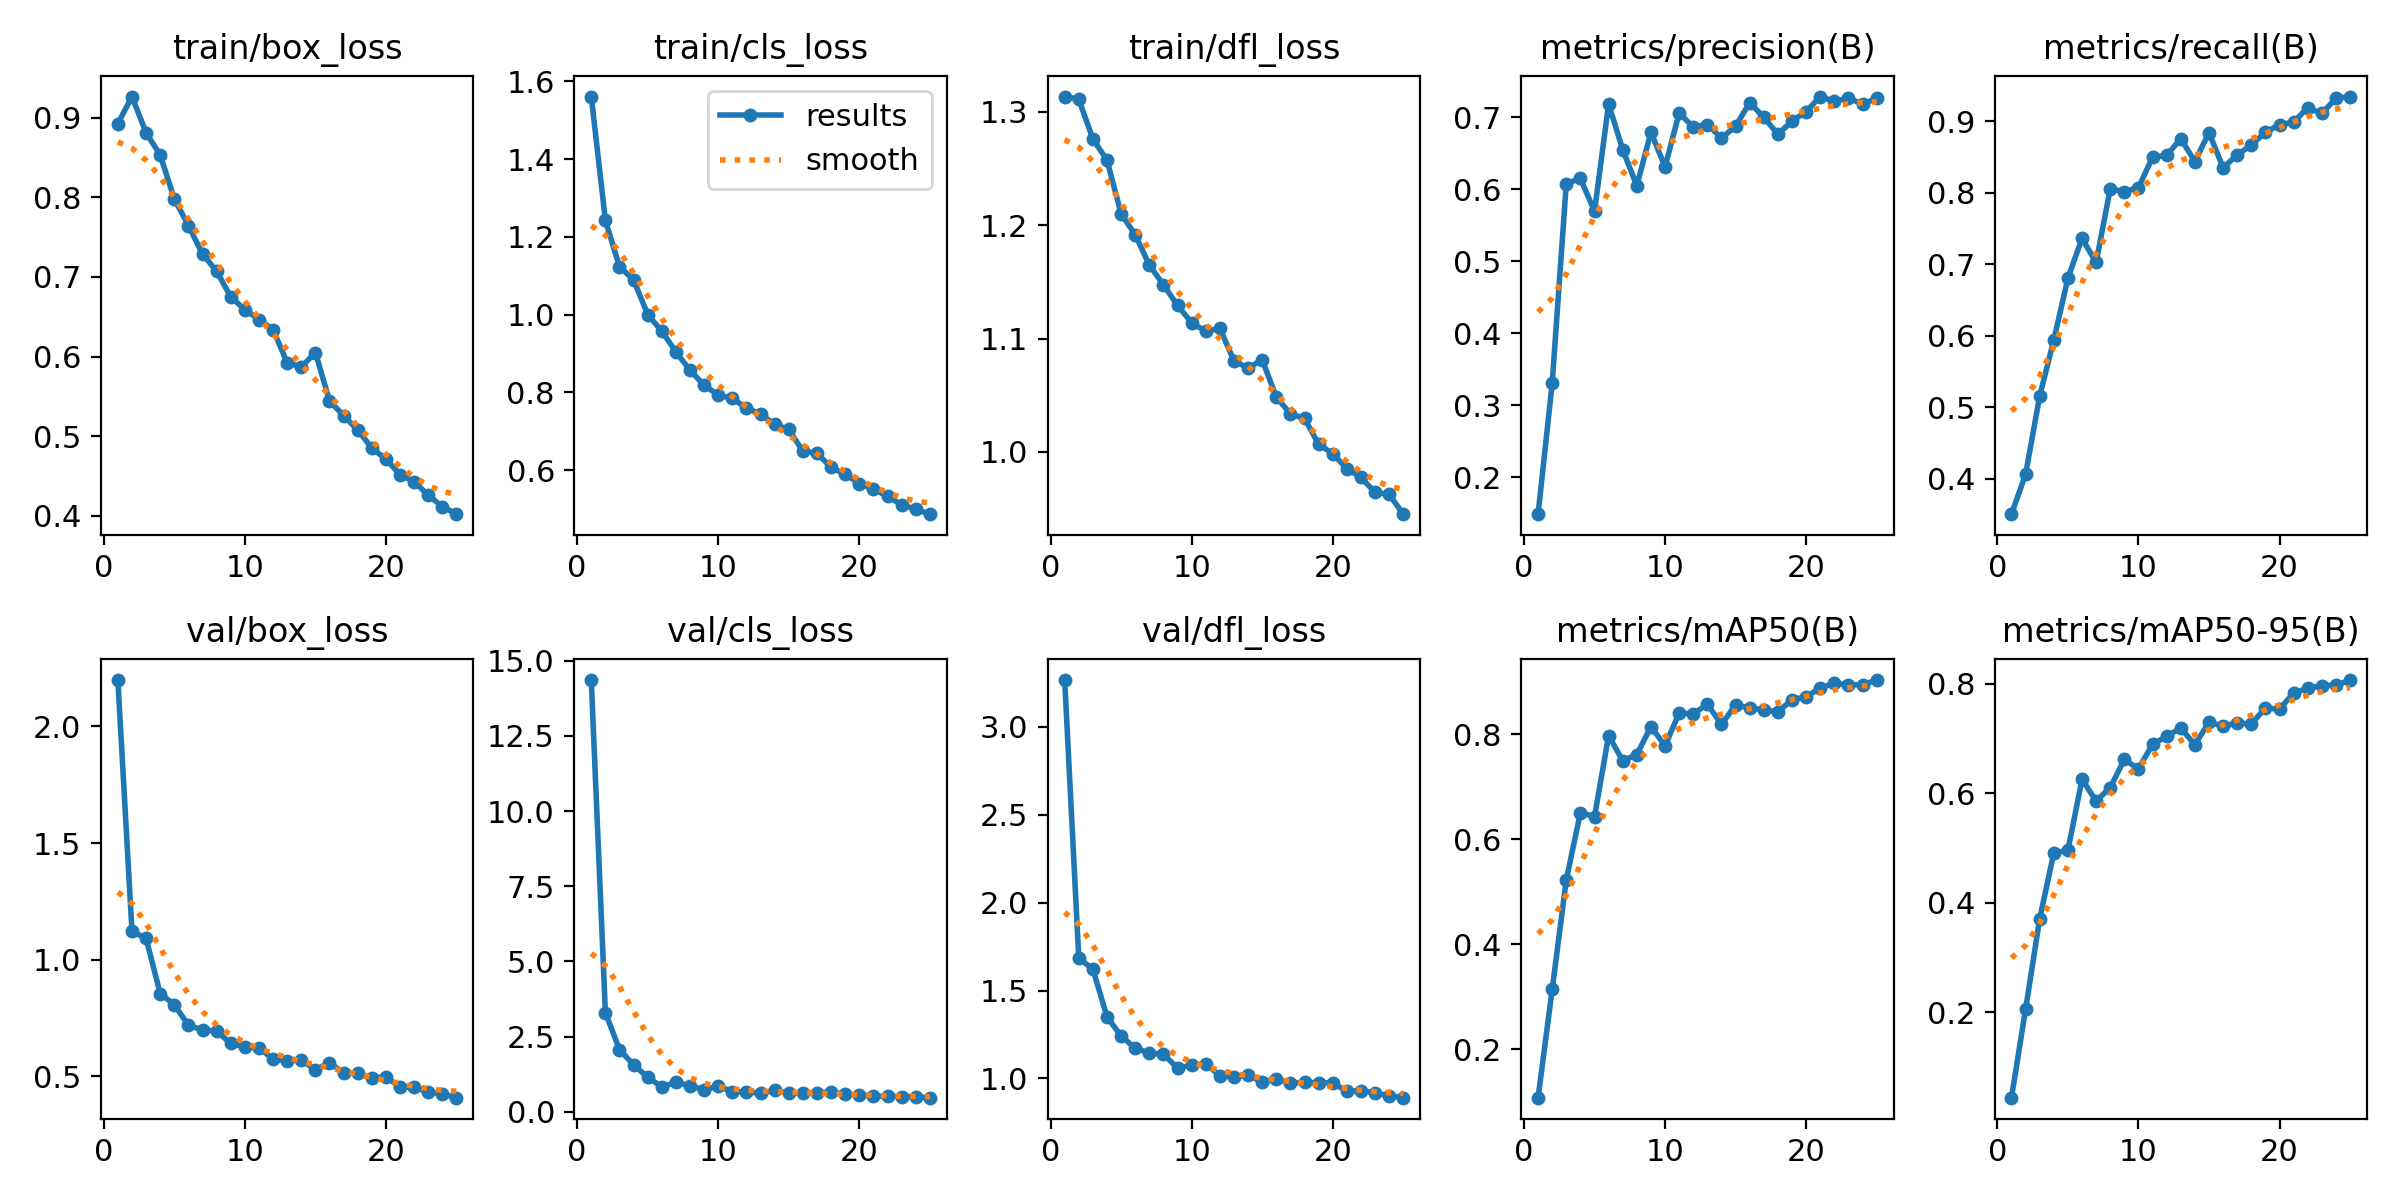

In [9]:
display(Image(filename=f"/content/runs/detect/train3/results.png", width=1000))

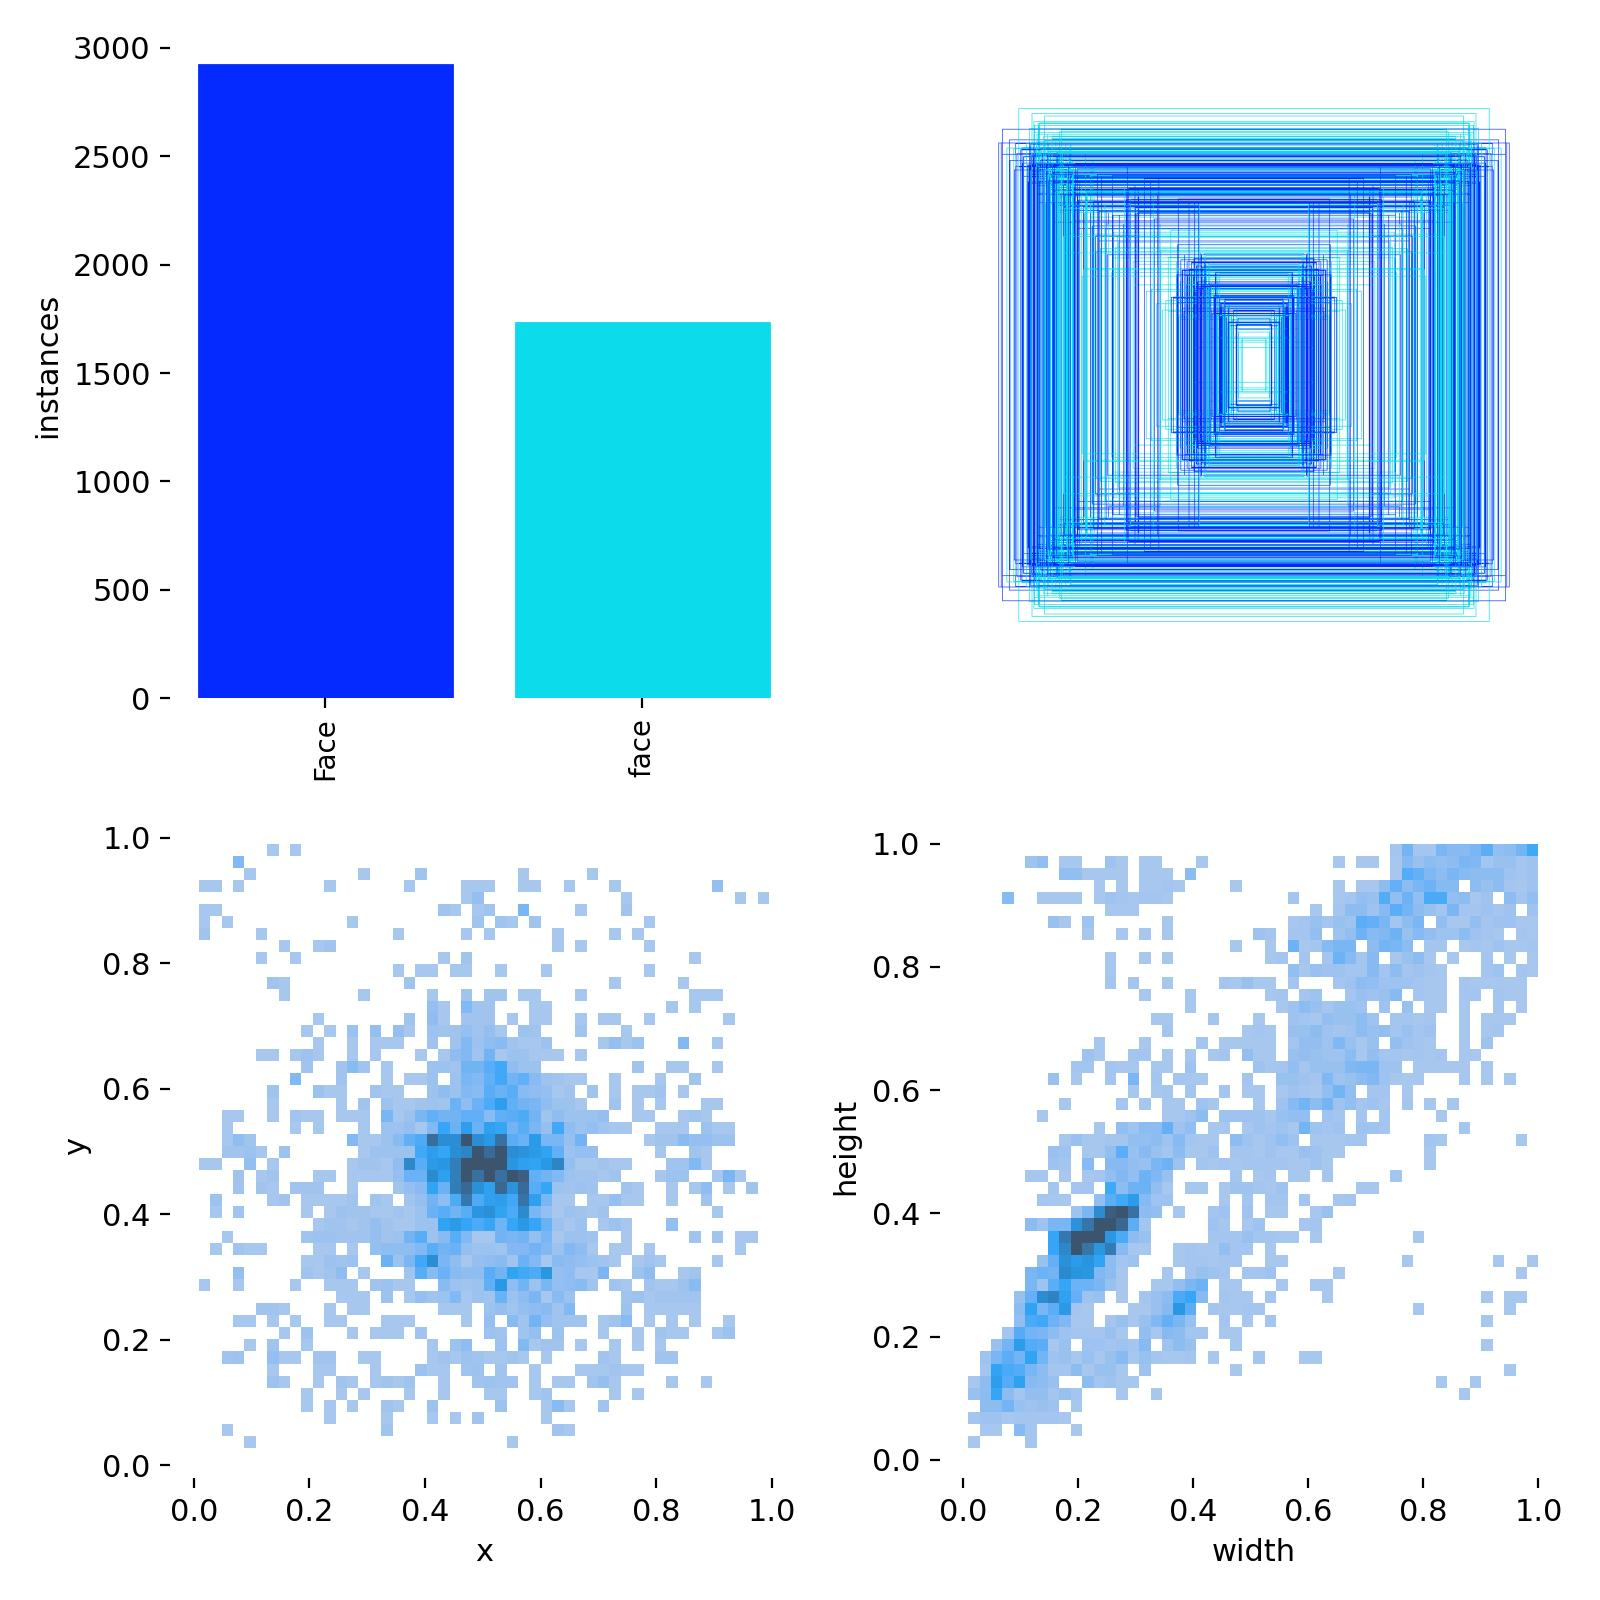

In [10]:
display(Image(filename=f"/content/runs/detect/train3/labels.jpg", width=1000))

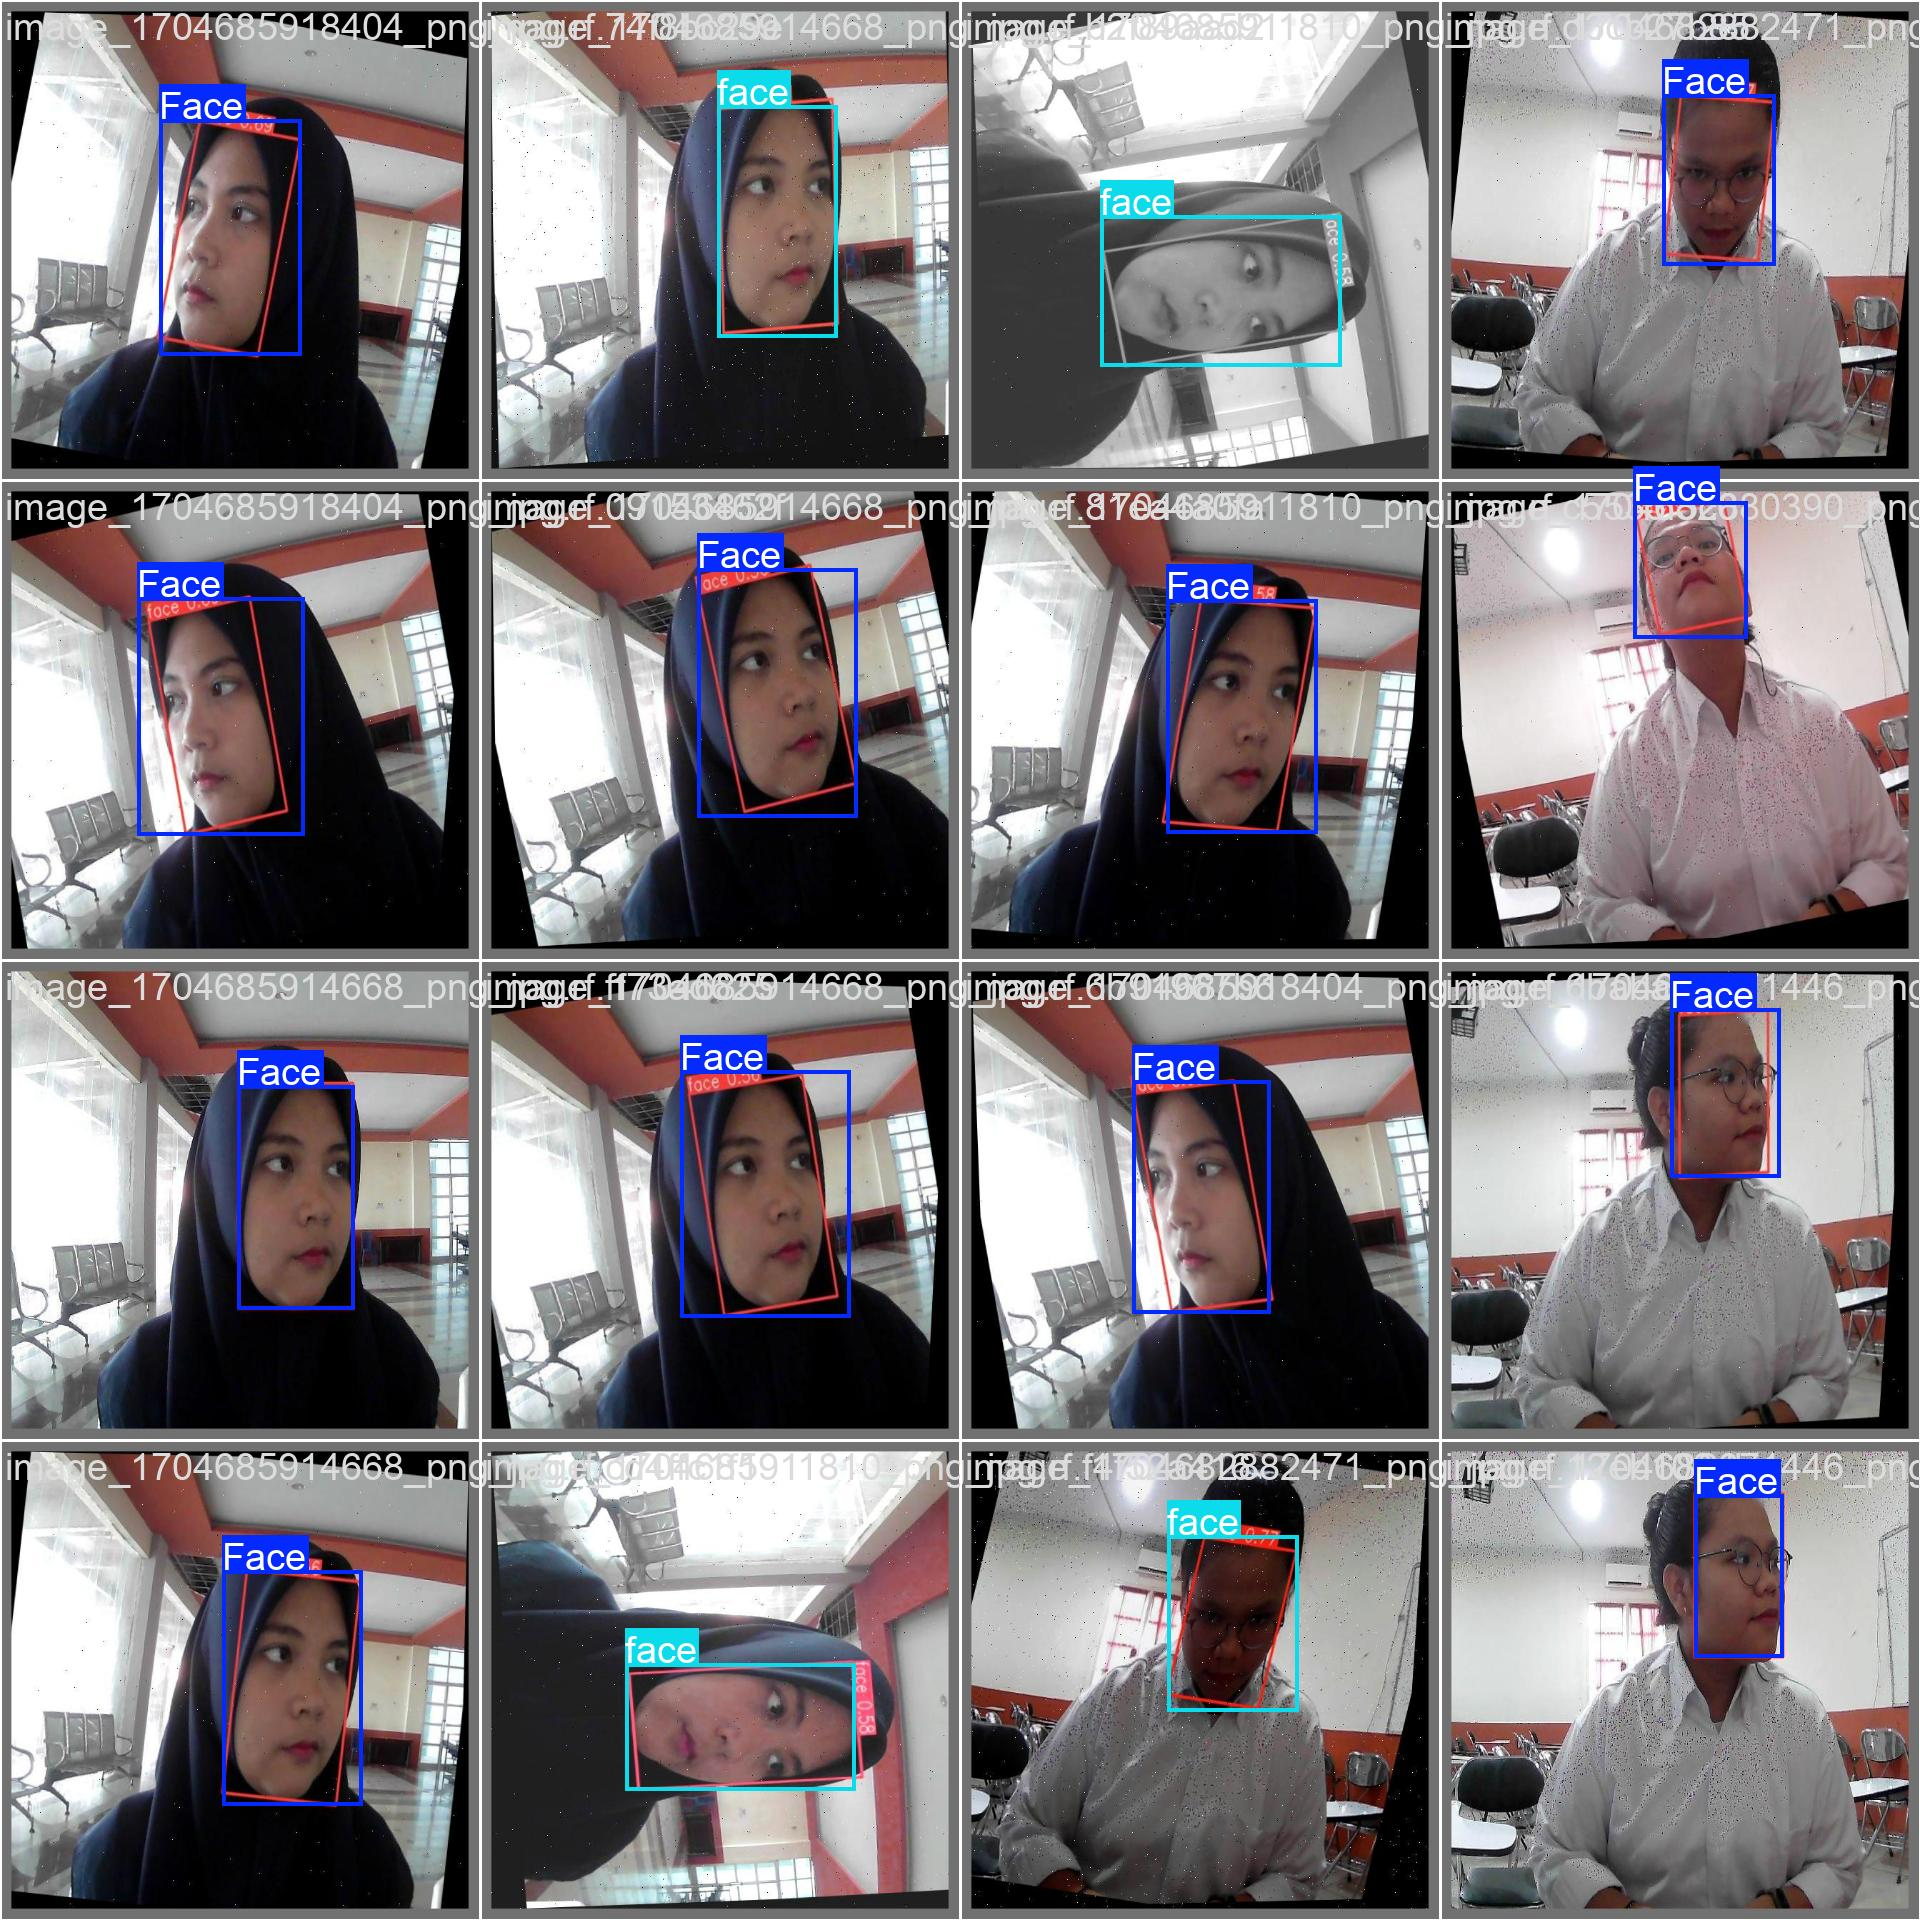

In [11]:
display(Image(filename=f"/content/runs/detect/train3/val_batch2_labels.jpg", width=1000))

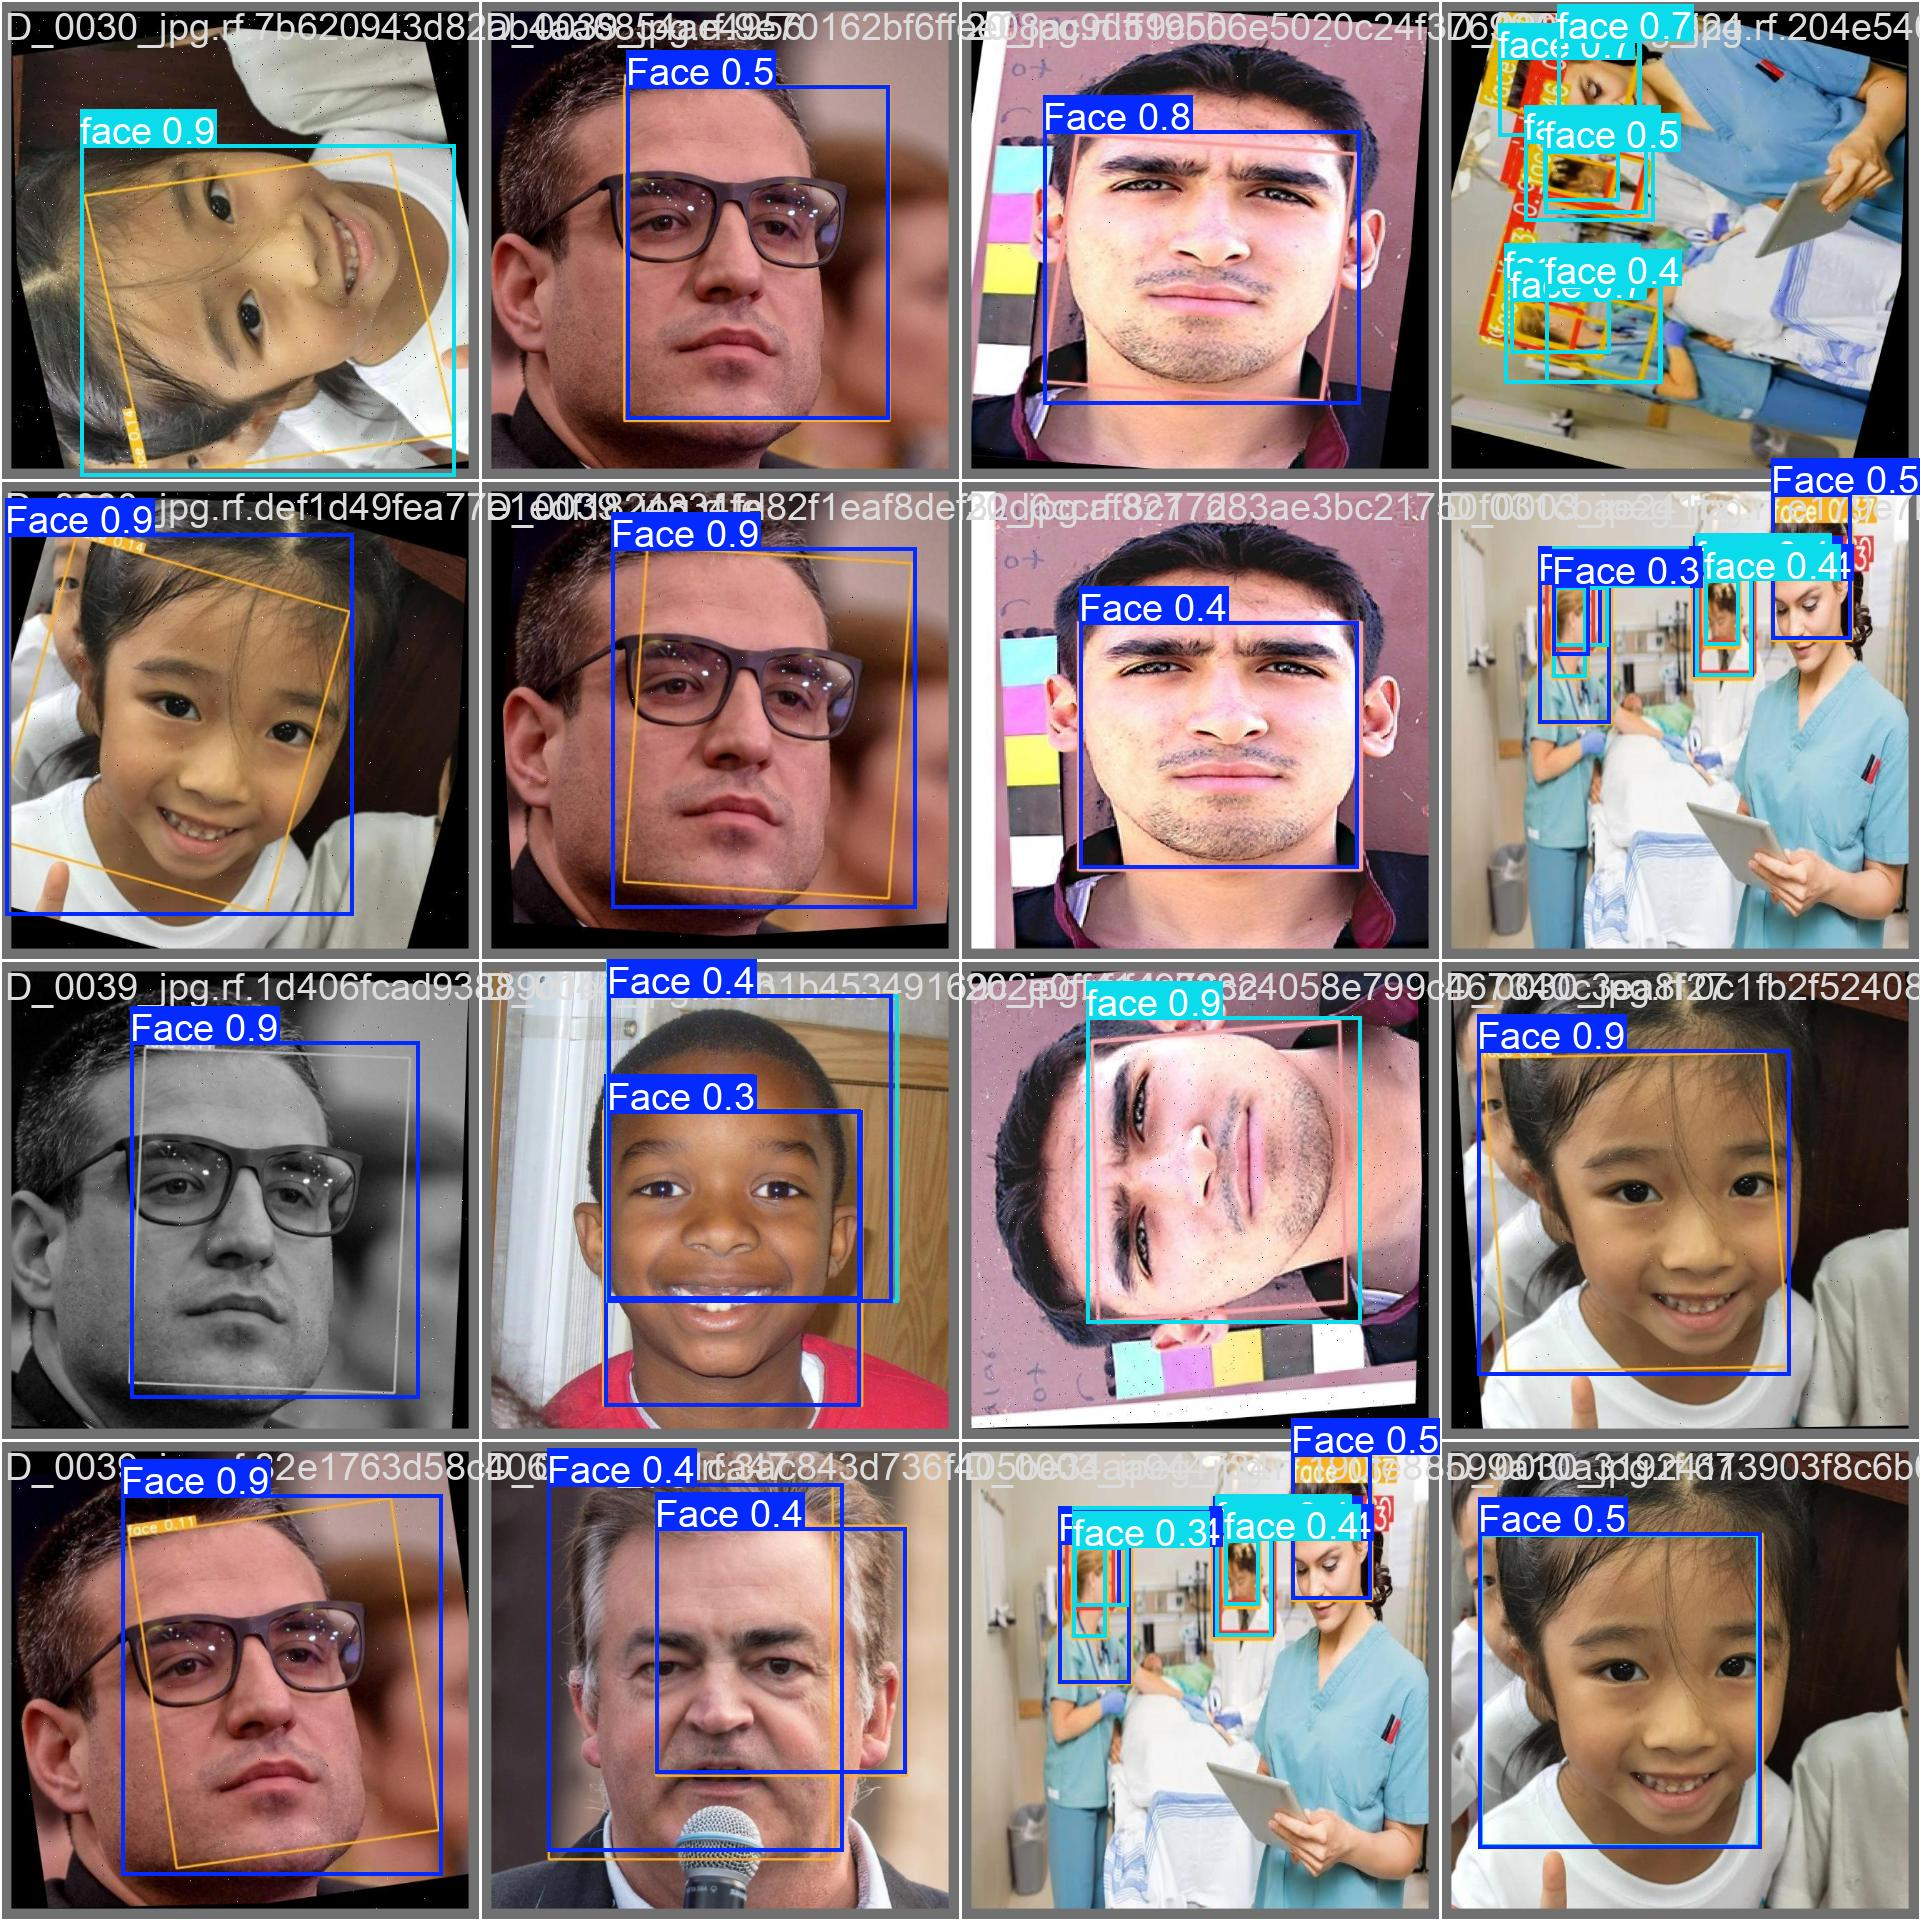

In [ ]:
display(Image(filename=f"/content/runs/detect/train3/val_batch2_pred.jpg", width=1000))

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt imgsz=640 conf=0.5 source=/content/drive/MyDrive/face_detection_task

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 /content/drive/MyDrive/face_detection_task/WhatsApp Image 2024-10-30 at 12.45.35 AM.jpeg: 640x288 (no detections), 65.2ms
image 2/2 /content/drive/MyDrive/face_detection_task/WhatsApp Image 2024-10-30 at 12.45.37 AM (2).jpeg: 640x288 (no detections), 23.1ms
Speed: 1.8ms preprocess, 44.2ms inference, 13.6ms postprocess per image at shape (1, 3, 640, 288)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt imgsz=640 conf=0.5 source=/content/face-detection-1/test/images

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1513 /content/face-detection-1/test/images/0_10725_jpg.rf.2211d1905defbdf8df9fe13f2191bc86.jpg: 640x640 4 Faces, 37.0ms
image 2/1513 /content/face-detection-1/test/images/0_10725_jpg.rf.a2a7ce9d20e47c441ed87e73b35741a4.jpg: 640x640 4 Faces, 37.0ms
image 3/1513 /content/face-detection-1/test/images/101_jpg.rf.13a210b8f1b51dc497bb936285ae72b4.jpg: 640x640 1 Face, 36.9ms
image 4/1513 /content/face-detection-1/test/images/101_jpg.rf.4b93ceef452f206105e769dd650cd6b9.jpg: 640x640 1 Face, 36.9ms
image 5/1513 /content/face-detection-1/test/images/101_jpg.rf.4f1bac551eface241ef0d8b8de2c84b9.jpg: 640x640 (no detections), 37.0ms
image 6/1513 /content/face-detection-1/test/images/101_jpg.rf.cb35b5f23de677941f6acb4b329836ab.jpg: 640x640 1 face, 36.9ms
image 7/1513 /content/face-detection-1/test/images/104_jpg.rf.635ee4af4a13a40

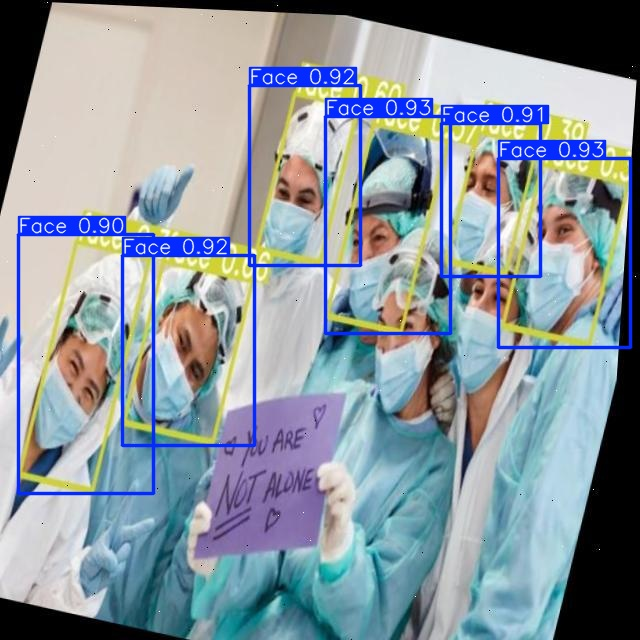

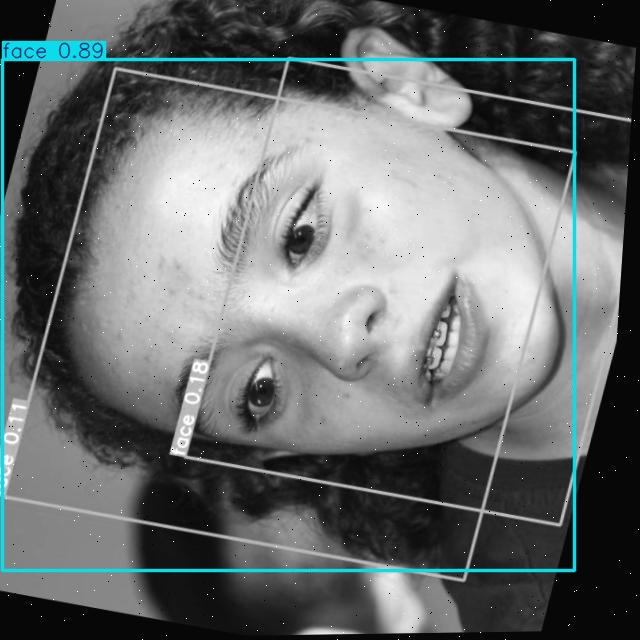

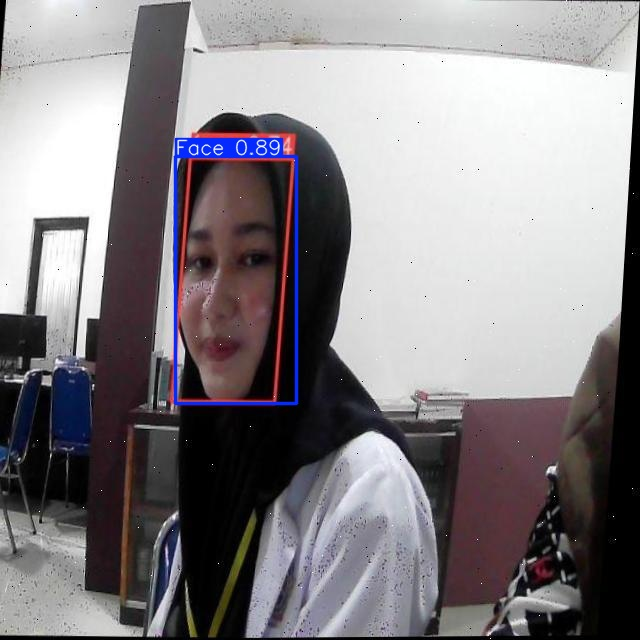

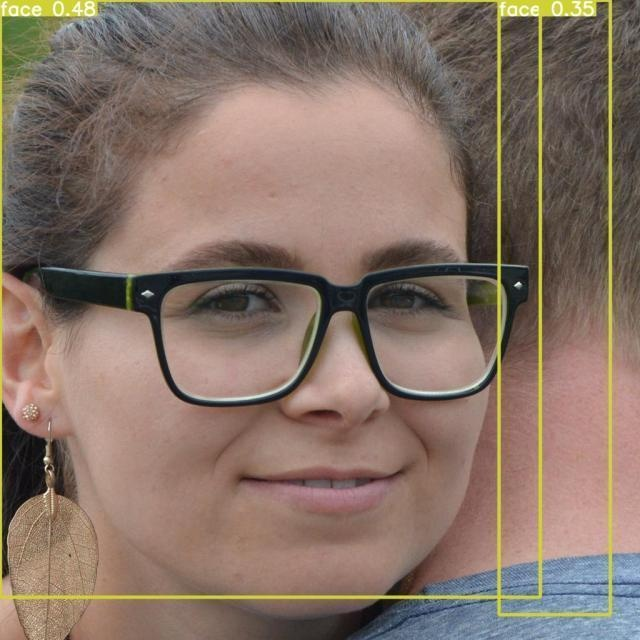

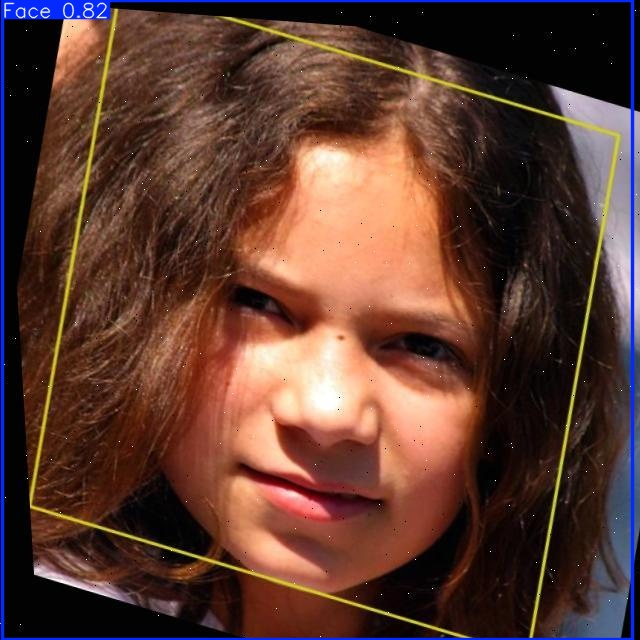

In [17]:
import glob
from PIL import Image as PILImage
from IPython.display import display
i=0
for imageName in glob.glob("/content/runs/detect/predict2/*.jpg")[20:25]:
    # if i %25 ==0:
    #   print("\n")
      display(Image(filename=imageName))

